In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df_index = pd.read_csv("economic_index.csv")

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df_index.drop(columns=["Unnamed: 0", "year", "month"], axis = 1, inplace = True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
## check null
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

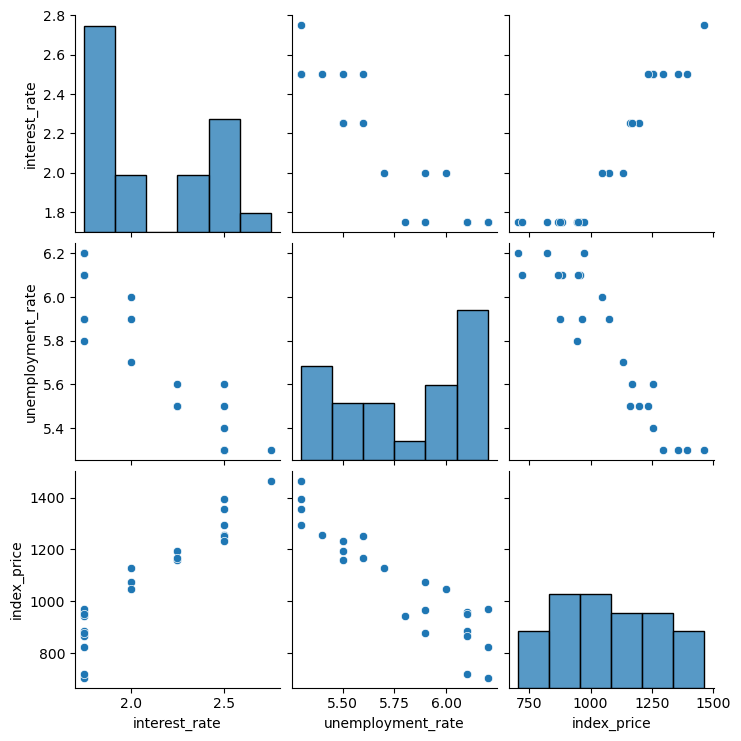

In [7]:
## Lets do some visualization

import seaborn as sns
sns.pairplot(df_index);

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


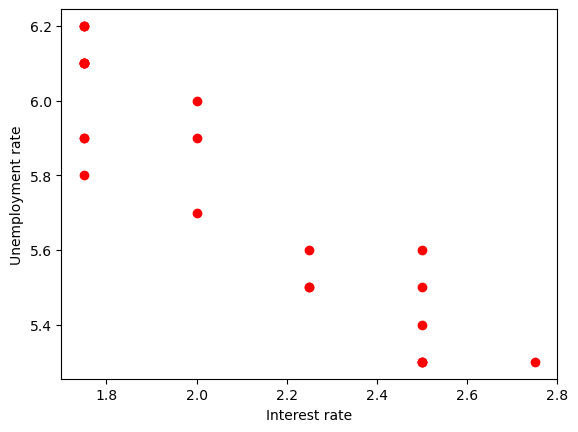

In [9]:
## visualize data points more closely

plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate");

In [10]:
## independent and dependent features

X = df_index.iloc[:, :-1]
y = df_index.iloc[:,-1]

In [11]:
## train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [12]:
import seaborn as sns

Text(0, 0.5, 'Index Price')

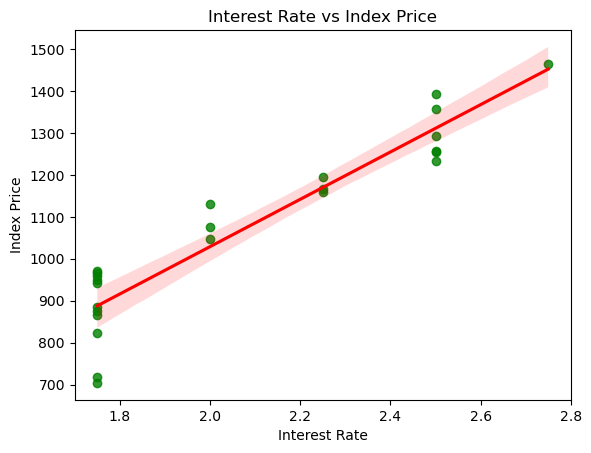

In [13]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'], data=df_index, color='green', line_kws={'color': 'red'}); #It shows the relationship between two numerical variables by plotting
plt.title('Interest Rate vs Index Price')
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')

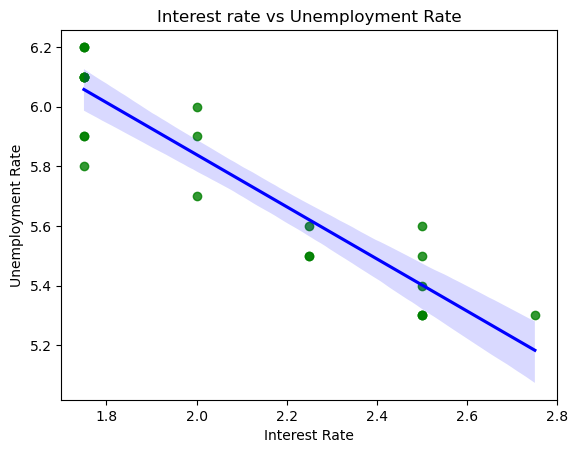

In [14]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'], data=df_index, color='green',line_kws={'color':'blue'});
plt.title('Interest rate vs Unemployment Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate');

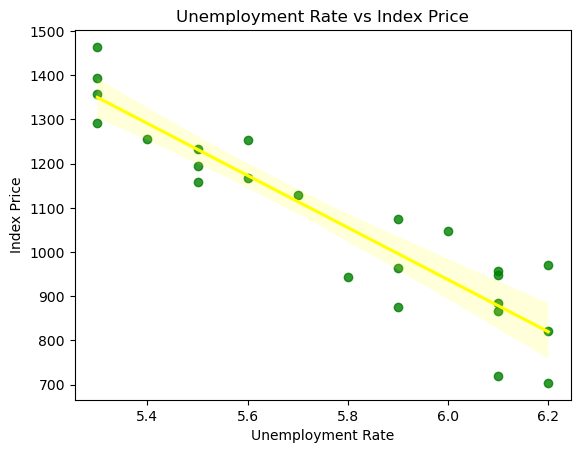

In [15]:
sns.regplot(x=df_index['unemployment_rate'], y=df_index['index_price'], data=df_index, color='green', line_kws={'color':'yellow'})
plt.title("Unemployment Rate vs Index Price")
plt.xlabel("Unemployment Rate")
plt.ylabel("Index Price");

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring="neg_mean_squared_error", cv = 3)

In [21]:
np.mean(validation_score)

-5914.82818016239

In [22]:
## prediction
y_pred = regression.predict(X_test)

In [23]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [24]:
### Performance Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712579
59.935781523235526
76.11677139574812


In [25]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R^2 score : {r2}")

R^2 score : 0.8278978091457142


In [26]:
Adjusted_R2 = 1 - ((1-r2) * (len(y_test)-1) / (len(y_test) - (X_test.shape[1]) - 1))
Adjusted_R2

0.713163015242857

## Assumptions

Text(0.5, 1.0, 'Actual vs Predicted Values')

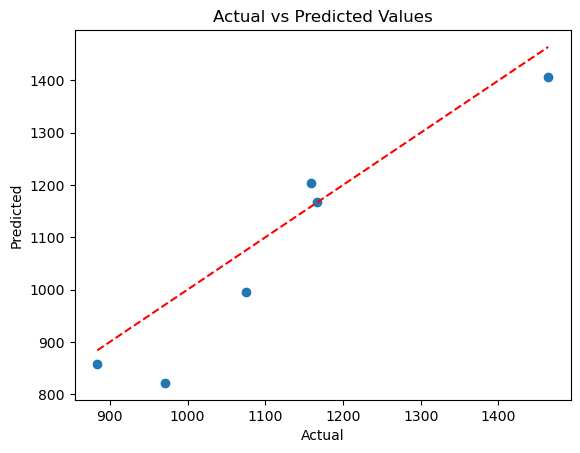

In [27]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')


In [28]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


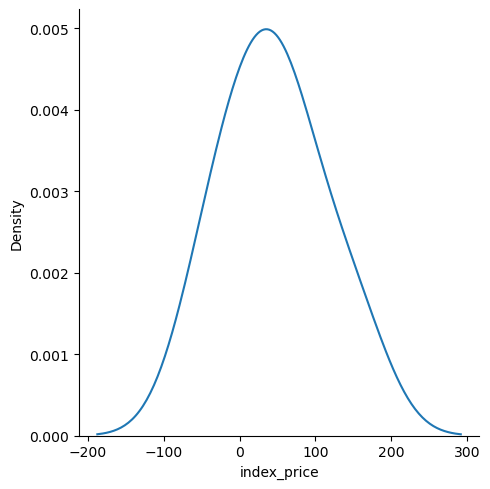

In [29]:
## plot this residuals

sns.displot(residuals, kind = 'kde'); # Bell-shaped curve centered at 0 -> Model errors are balanced (good sign!)

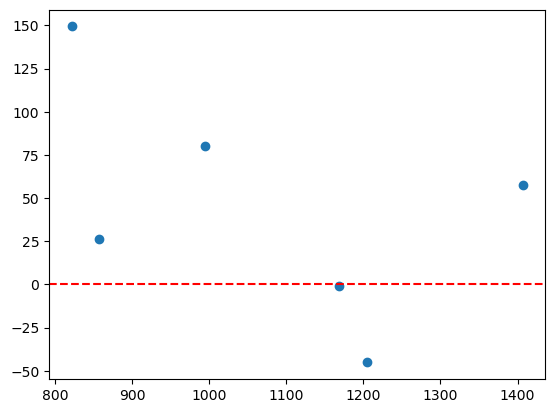

In [30]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')

In [31]:
### OLS Linear Regression

import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 24 Jul 2025   Prob (F-statistic):                       0.754
Time:                        14:44:30   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
print(regression.coef_)

[  88.27275507 -116.25716066]
